In [110]:
%matplotlib inline

import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
model = LinearRegression()

In [2]:
# Pull each txt file in stocks folder into a list of files
path = 'C:/Users/Tony/Desktop/BootcampFiles/GitHub/tickermagic/data/stocks/'
filepaths = glob.glob('C:/Users/Tony/Desktop/BootcampFiles/GitHub/tickermagic/data/stocks/*.txt')
filepaths[0]

'C:/Users/Tony/Desktop/BootcampFiles/GitHub/tickermagic/data/stocks\\a.us.txt'

In [3]:
# for each file, read into a pandas dataframe in a list of dataframes
tickerlist = [pd.read_csv(filepath) for filepath in filepaths]
tickerlist[0].head(5)

,Date,Open,High,Low,Close,Volume,OpenInt
0,1999-11-18,30.713,33.754,27.002,29.702,66277506,0
1,1999-11-19,28.986,29.027,26.872,27.257,16142920,0
2,1999-11-22,27.886,29.702,27.044,29.702,6970266,0
3,1999-11-23,28.688,29.446,27.002,27.002,6332082,0
4,1999-11-24,27.083,28.309,27.002,27.717,5132147,0


In [4]:
tickernamelist = [os.path.relpath(filepath, path) for filepath in filepaths]
tickernamelist

['a.us.txt',
 'aapl.us.txt',
 'amzn.us.txt',
 'bac.us.txt',
 'f.us.txt',
 'jp.us.txt',
 'nflx.us.txt',
 'pcg.us.txt',
 'tsla.us.txt',
 'yy.us.txt']

In [5]:
tickernamelist = [ticker.replace('.us.txt','') for ticker in tickernamelist]
tickernamelist

['a', 'aapl', 'amzn', 'bac', 'f', 'jp', 'nflx', 'pcg', 'tsla', 'yy']

In [6]:
for ticker, tickername in zip(tickerlist, tickernamelist):
    ticker['ticker'] = tickername

In [7]:
tickerlist[-1].head(5)

,Date,Open,High,Low,Close,Volume,OpenInt,ticker
0,2012-11-21,10.50,11.75,10.50,11.31,4567029,0,yy
1,2012-11-23,11.57,11.76,11.20,11.32,236917,0,yy
2,2012-11-26,11.50,11.50,10.81,11.30,257287,0,yy
3,2012-11-27,11.40,12.99,11.17,12.20,460347,0,yy
4,2012-11-28,12.29,13.15,12.18,13.00,740654,0,yy


In [14]:
amzn_df = tickerlist[2]
amzn_df.head(2)

,Date,Open,High,Low,Close,Volume,OpenInt,ticker
0,1997-05-16,1.97,1.98,1.71,1.73,14700000,0,amzn
1,1997-05-19,1.76,1.77,1.62,1.71,6106800,0,amzn


In [17]:
amzn_df = amzn_df.drop(['Open', 'High', 'Low', 'OpenInt'], axis=1)
amzn_df.head(2)

,Date,Close,Volume,ticker
0,1997-05-16,1.73,14700000,amzn
1,1997-05-19,1.71,6106800,amzn


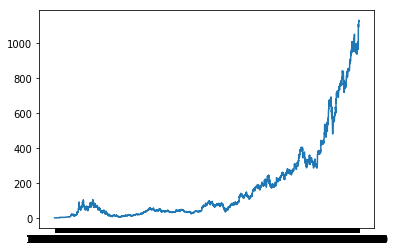

In [24]:
plt.plot(amzn_df['Date'], amzn_df['Close'])
plt.show()

In [8]:
alltickers_df = pd.concat(tickerlist, ignore_index=True)
alltickers_df.head(5)

,Date,Open,High,Low,Close,Volume,OpenInt,ticker
0,1999-11-18,30.713,33.754,27.002,29.702,66277506,0,a
1,1999-11-19,28.986,29.027,26.872,27.257,16142920,0,a
2,1999-11-22,27.886,29.702,27.044,29.702,6970266,0,a
3,1999-11-23,28.688,29.446,27.002,27.002,6332082,0,a
4,1999-11-24,27.083,28.309,27.002,27.717,5132147,0,a


In [9]:
alltickers_df.tail(5)

,Date,Open,High,Low,Close,Volume,OpenInt,ticker
52687,2017-11-06,90.90,93.75,90.51,92.35,984511,0,yy
52688,2017-11-07,92.97,94.27,91.06,91.36,636653,0,yy
52689,2017-11-08,91.10,91.76,87.73,89.40,1116162,0,yy
52690,2017-11-09,88.72,91.09,88.39,90.65,821527,0,yy
52691,2017-11-10,89.77,90.40,88.08,88.92,550619,0,yy


In [26]:
from sklearn.linear_model import LinearRegression


In [27]:
amzn_df.head(2)

,Date,Close,Volume,ticker
0,1997-05-16,1.73,14700000,amzn
1,1997-05-19,1.71,6106800,amzn


In [29]:
X = amzn_df[["Date", "Volume"]]
y = amzn_df["Close"].values.reshape(-1, 1)
print(X.shape, y.shape)

(5153, 2) (5153, 1)


In [35]:
X['Date'] = pd.to_datetime(X['Date'])

C:\Users\Tony\AppData\Local\conda\conda\envs\pdata\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
X['Date'][0]

Timestamp('1997-05-16 00:00:00')

In [46]:
amzn_df['pct_change'] = amzn_df['Close'].pct_change()

In [49]:
# Convert Percent Change of Closing Price to Log Return
amzn_df['log_ret'] = np.log(amzn_df['Close'] / amzn_df['Close'].shift(1))
amzn_df.head(5)

,Date,Close,Volume,ticker,pct_change,log_ret
0,1997-05-16,1.73,14700000,amzn,NaN,NaN
1,1997-05-19,1.71,6106800,amzn,-0.011561,-0.011628
2,1997-05-20,1.64,5467200,amzn,-0.040936,-0.041797
3,1997-05-21,1.43,18853200,amzn,-0.128049,-0.137022
4,1997-05-22,1.40,11776800,amzn,-0.020979,-0.021202


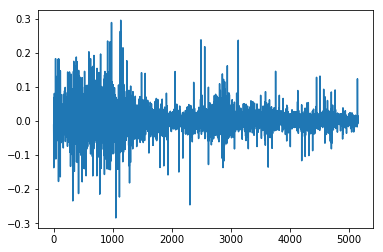

In [51]:
plt.plot(amzn_df['log_ret'])

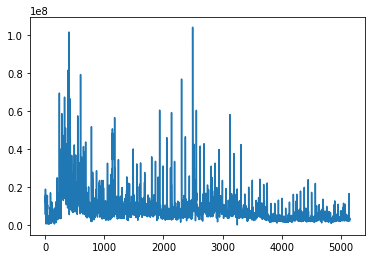

In [52]:
plt.plot(amzn_df['Volume'])

In [143]:
amzn_df['t1'] = tminus1
amzn_df['t2'] = tminus2
amzn_df['t3'] = tminus3
amzn_df.head(5)

,Date,Close,Volume,ticker,pct_change,log_ret,t1,t2,t3
0,1997-05-16,1.73,14700000,amzn,NaN,NaN,-0.011628,-0.011628,-0.011628
1,1997-05-19,1.71,6106800,amzn,-0.011561,-0.011628,-0.011628,-0.011628,-0.011628
2,1997-05-20,1.64,5467200,amzn,-0.040936,-0.041797,-0.011628,-0.011628,-0.011628
3,1997-05-21,1.43,18853200,amzn,-0.128049,-0.137022,-0.041797,-0.011628,-0.011628
4,1997-05-22,1.40,11776800,amzn,-0.020979,-0.021202,-0.137022,-0.041797,-0.011628


In [145]:
amzn_df['log_ret'] = amzn_df['log_ret'].bfill()
amzn_df.head(5)

,Date,Close,Volume,ticker,pct_change,log_ret,t1,t2,t3
0,1997-05-16,1.73,14700000,amzn,NaN,-0.011628,-0.011628,-0.011628,-0.011628
1,1997-05-19,1.71,6106800,amzn,-0.011561,-0.011628,-0.011628,-0.011628,-0.011628
2,1997-05-20,1.64,5467200,amzn,-0.040936,-0.041797,-0.011628,-0.011628,-0.011628
3,1997-05-21,1.43,18853200,amzn,-0.128049,-0.137022,-0.041797,-0.011628,-0.011628
4,1997-05-22,1.40,11776800,amzn,-0.020979,-0.021202,-0.137022,-0.041797,-0.011628


In [148]:
amzn_df2 = amzn_df.drop(['Date', 'Close', 'Volume', 'ticker', 'pct_change'], 1)
amzn_df2.head()
#data = data.drop(['DATE'], 1)

,log_ret,t1,t2,t3
0,-0.011628,-0.011628,-0.011628,-0.011628
1,-0.011628,-0.011628,-0.011628,-0.011628
2,-0.041797,-0.011628,-0.011628,-0.011628
3,-0.137022,-0.041797,-0.011628,-0.011628
4,-0.021202,-0.137022,-0.041797,-0.011628


In [152]:
n = amzn_df2.shape[0]
p = amzn_df2.shape[1]
print(n, p)

5153 4


In [157]:
a_data = amzn_df2.values

In [158]:
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end + 1
test_end = n
data_train = a_data[np.arange(train_start, train_end), :]
data_test = a_data[np.arange(test_start, test_end), :]

# go to model train section at end

In [124]:
# tminus1 = amzn_df['log_ret'].shift(1)[-5:]
tminus1 = amzn_df['log_ret'].shift(1)
tminus1 = tminus1.bfill()
tminus1

0      -0.011628
1      -0.011628
2      -0.011628
3      -0.041797
4      -0.137022
5      -0.021202
6       0.068993
7       0.051960
8      -0.032157
9      -0.013158
10     -0.006645
11      0.006645
12     -0.020068
13     -0.041385
14      0.081126
15      0.075035
16      0.017911
17     -0.067304
18     -0.025642
19      0.038221
20     -0.012579
21     -0.006349
22     -0.038966
23      0.000000
24      0.000000
25      0.013158
26     -0.019803
27      0.006645
28      0.000000
29      0.000000
          ...   
5123    0.005162
5124   -0.002249
5125   -0.002181
5126    0.008686
5127    0.015825
5128    0.008790
5129    0.001495
5130   -0.003832
5131    0.007870
5132    0.005942
5133    0.002006
5134    0.003384
5135    0.002769
5136   -0.012093
5137   -0.010476
5138   -0.003757
5139   -0.017043
5140    0.009886
5141   -0.003069
5142   -0.000493
5143    0.124131
5144    0.008952
5145   -0.005027
5146   -0.001449
5147   -0.008608
5148    0.015759
5149    0.008117
5150    0.0022

In [125]:
tminus2 = amzn_df['log_ret'].shift(2)
tminus2 = tminus2.bfill()
tminus2

0      -0.011628
1      -0.011628
2      -0.011628
3      -0.011628
4      -0.041797
5      -0.137022
6      -0.021202
7       0.068993
8       0.051960
9      -0.032157
10     -0.013158
11     -0.006645
12      0.006645
13     -0.020068
14     -0.041385
15      0.081126
16      0.075035
17      0.017911
18     -0.067304
19     -0.025642
20      0.038221
21     -0.012579
22     -0.006349
23     -0.038966
24      0.000000
25      0.000000
26      0.013158
27     -0.019803
28      0.006645
29      0.000000
          ...   
5123    0.005799
5124    0.005162
5125   -0.002249
5126   -0.002181
5127    0.008686
5128    0.015825
5129    0.008790
5130    0.001495
5131   -0.003832
5132    0.007870
5133    0.005942
5134    0.002006
5135    0.003384
5136    0.002769
5137   -0.012093
5138   -0.010476
5139   -0.003757
5140   -0.017043
5141    0.009886
5142   -0.003069
5143   -0.000493
5144    0.124131
5145    0.008952
5146   -0.005027
5147   -0.001449
5148   -0.008608
5149    0.015759
5150    0.0081

In [126]:
tminus3 = amzn_df['log_ret'].shift(3)
tminus3 = tminus3.bfill()
tminus3

0      -0.011628
1      -0.011628
2      -0.011628
3      -0.011628
4      -0.011628
5      -0.041797
6      -0.137022
7      -0.021202
8       0.068993
9       0.051960
10     -0.032157
11     -0.013158
12     -0.006645
13      0.006645
14     -0.020068
15     -0.041385
16      0.081126
17      0.075035
18      0.017911
19     -0.067304
20     -0.025642
21      0.038221
22     -0.012579
23     -0.006349
24     -0.038966
25      0.000000
26      0.000000
27      0.013158
28     -0.019803
29      0.006645
          ...   
5123    0.012988
5124    0.005799
5125    0.005162
5126   -0.002249
5127   -0.002181
5128    0.008686
5129    0.015825
5130    0.008790
5131    0.001495
5132   -0.003832
5133    0.007870
5134    0.005942
5135    0.002006
5136    0.003384
5137    0.002769
5138   -0.012093
5139   -0.010476
5140   -0.003757
5141   -0.017043
5142    0.009886
5143   -0.003069
5144   -0.000493
5145    0.124131
5146    0.008952
5147   -0.005027
5148   -0.001449
5149   -0.008608
5150    0.0157

In [120]:
import scipy

In [123]:
tminus4 = amzn_df['log_ret'].shift(4)
tminus4 = tminus4.bfill()
tminus4

0      -0.011628
1      -0.011628
2      -0.011628
3      -0.011628
4      -0.011628
5      -0.011628
6      -0.041797
7      -0.137022
8      -0.021202
9       0.068993
10      0.051960
11     -0.032157
12     -0.013158
13     -0.006645
14      0.006645
15     -0.020068
16     -0.041385
17      0.081126
18      0.075035
19      0.017911
20     -0.067304
21     -0.025642
22      0.038221
23     -0.012579
24     -0.006349
25     -0.038966
26      0.000000
27      0.000000
28      0.013158
29     -0.019803
          ...   
5123   -0.001267
5124    0.012988
5125    0.005799
5126    0.005162
5127   -0.002249
5128   -0.002181
5129    0.008686
5130    0.015825
5131    0.008790
5132    0.001495
5133   -0.003832
5134    0.007870
5135    0.005942
5136    0.002006
5137    0.003384
5138    0.002769
5139   -0.012093
5140   -0.010476
5141   -0.003757
5142   -0.017043
5143    0.009886
5144   -0.003069
5145   -0.000493
5146    0.124131
5147    0.008952
5148   -0.005027
5149   -0.001449
5150   -0.0086

In [141]:

amzn_df.tail(5)

,Date,Close,Volume,ticker,pct_change,log_ret
5148,2017-11-06,1120.66,3331738,amzn,0.008150,0.008117
5149,2017-11-07,1123.17,2684443,amzn,0.002240,0.002237
5150,2017-11-08,1132.88,2576010,amzn,0.008645,0.008608
5151,2017-11-09,1129.13,3729978,amzn,-0.003310,-0.003316
5152,2017-11-10,1125.35,2179181,amzn,-0.003348,-0.003353


In [117]:
amzn_df.tail(10)

,Date,Close,Volume,ticker,pct_change,log_ret
5143,2017-10-30,1110.85,6613064,amzn,0.008992,0.008952
5144,2017-10-31,1105.28,3476967,amzn,-0.005014,-0.005027
5145,2017-11-01,1103.68,3755511,amzn,-0.001448,-0.001449
5146,2017-11-02,1094.22,3684876,amzn,-0.008571,-0.008608
5147,2017-11-03,1111.60,3751480,amzn,0.015883,0.015759
5148,2017-11-06,1120.66,3331738,amzn,0.008150,0.008117
5149,2017-11-07,1123.17,2684443,amzn,0.002240,0.002237
5150,2017-11-08,1132.88,2576010,amzn,0.008645,0.008608
5151,2017-11-09,1129.13,3729978,amzn,-0.003310,-0.003316
5152,2017-11-10,1125.35,2179181,amzn,-0.003348,-0.003353


In [159]:
# Build X and y
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

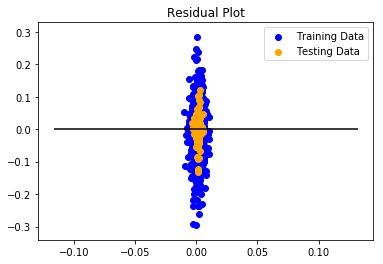

In [160]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [161]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.000351932739614988, R2: -0.001682640908384547
